In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import math

import scipy.stats as sp

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [50]:
# read the data
df1 = "Resources/caffeine.csv"
df1 = pd.read_csv(df1)
df1

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [52]:
df1['type'].value_counts()

Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64

In [53]:
df1['Calories'].value_counts()

0      200
5       32
10      30
160     22
140     21
      ... 
155      1
117      1
78       1
118      1
299      1
Name: Calories, Length: 98, dtype: int64

In [54]:
df1['Caffeine (mg)'].value_counts()

80      37
100     34
160     33
0       28
120     23
        ..
1150     1
1325     1
728      1
1101     1
99       1
Name: Caffeine (mg), Length: 162, dtype: int64

In [55]:
df1['Volume (ml)'].value_counts()

354.882000    159
473.176000    125
236.588000     96
250.191810     35
59.147000      19
             ... 
428.815750      1
380.019475      1
370.260220      1
339.208045      1
329.744525      1
Name: Volume (ml), Length: 70, dtype: int64

In [56]:
df1['drink'].value_counts()

Costa Coffee                 1
Redline Xtreme Shot          1
Equip Pure Energy Shot       1
Mana Energy Potion           1
Clif Shot Energy Gel         1
                            ..
V Energy Drink               1
XL Energy Drink (EU)         1
Crave Energy Drink (UK)      1
Bomba (EU)                   1
MiO Energy Water Enhancer    1
Name: drink, Length: 610, dtype: int64

In [57]:
grouped_df1=df1.groupby(["type"])
grouped_df1.head(500)

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


In [58]:
df1.columns

Index(['drink', 'Volume (ml)', 'Calories', 'Caffeine (mg)', 'type'], dtype='object')

In [59]:
df1=df1.groupby("type")[['Volume (ml)','Calories','Caffeine (mg)']].mean().reset_index()
df1.head()

,type,Volume (ml),Calories,Caffeine (mg)
0,Coffee,335.870855,73.497110,200.589595
1,Energy Drinks,388.971198,86.671233,147.867580
2,Energy Shots,57.742259,16.500000,193.416667
3,Soft Drinks,355.243454,111.111111,33.677778
4,Tea,360.474080,52.757576,55.863636


In [60]:
df1.type.unique()

array(['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water'], dtype=object)

In [61]:
df1.type.value_counts()

Coffee           1
Energy Drinks    1
Energy Shots     1
Soft Drinks      1
Tea              1
Water            1
Name: type, dtype: int64

In [62]:
df1.describe()

,Volume (ml),Calories,Caffeine (mg)
count,6.000000,6.000000,6.000000
mean,315.481993,58.679249,114.191004
std,128.147958,39.468036,75.386253
min,57.742259,11.538462,33.677778
25%,340.714005,25.564394,54.263986
50%,357.858767,63.127343,101.865608
75%,381.846918,83.377702,182.029395
max,394.590111,111.111111,200.589595


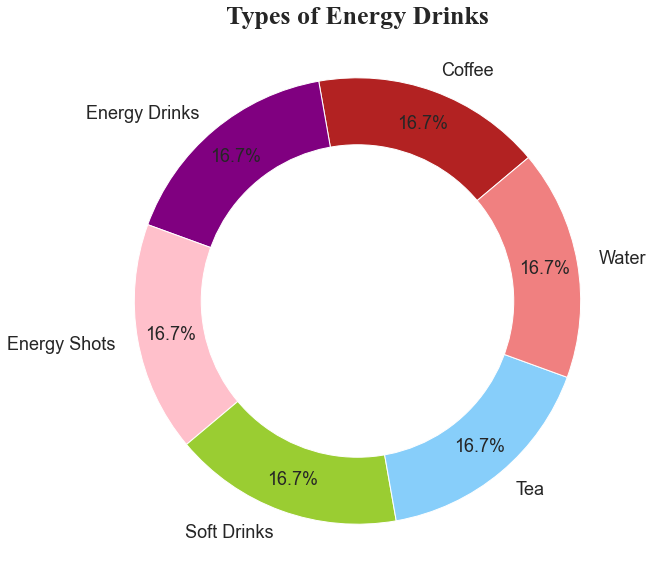

In [63]:
#DONUT CHART - TYPES OF DRINKS

drink_types = df2.type.value_counts().index.tolist()
drink_type_counts = df2.type.value_counts().values.tolist()
colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0, 0, 0, 0, 0, 0)
fig = plt.figure(figsize=(10,10))
plt.title("Types of Energy Drinks", fontsize = 26, fontweight = "bold", font = "Times New Roman")
plt.axis("equal")
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.pie(drink_type_counts, explode=explode, labels=drink_types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 18}, pctdistance=0.85)
fig.gca().add_artist(centre_circle)
plt.show()

In [64]:
#FILTER DRINKS WITH LESS THAN 500MG

df2=df1.loc[df1["Caffeine (mg)"] <500].reset_index()
df2

,index,type,Volume (ml),Calories,Caffeine (mg)
0,0,Coffee,335.870855,73.497110,200.589595
1,1,Energy Drinks,388.971198,86.671233,147.867580
2,2,Energy Shots,57.742259,16.500000,193.416667
3,3,Soft Drinks,355.243454,111.111111,33.677778
4,4,Tea,360.474080,52.757576,55.863636
5,5,Water,394.590111,11.538462,53.730769


In [65]:
df2=df1.copy()

In [66]:
#ADD CAFFEINE AND CALORIES PER 100ML
df2['Caffeine_per_100ml']= df2["Caffeine (mg)"]/df2["Volume (ml)"]*100
df2['Calories_per_100ml']= df2["Calories"]/df2["Volume (ml)"]*100

df2

,type,Volume (ml),Calories,Caffeine (mg),Caffeine_per_100ml,Calories_per_100ml
0,Coffee,335.870855,73.497110,200.589595,59.722239,21.882551
1,Energy Drinks,388.971198,86.671233,147.867580,38.015046,22.282172
2,Energy Shots,57.742259,16.500000,193.416667,334.965536,28.575259
3,Soft Drinks,355.243454,111.111111,33.677778,9.480197,31.277455
4,Tea,360.474080,52.757576,55.863636,15.497269,14.635609
5,Water,394.590111,11.538462,53.730769,13.616857,2.924164


In [67]:
df2.columns

Index(['type', 'Volume (ml)', 'Calories', 'Caffeine (mg)',
       'Caffeine_per_100ml', 'Calories_per_100ml'],
      dtype='object')

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                6 non-null      object 
 1   Volume (ml)         6 non-null      float64
 2   Calories            6 non-null      float64
 3   Caffeine (mg)       6 non-null      float64
 4   Caffeine_per_100ml  6 non-null      float64
 5   Calories_per_100ml  6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes


In [69]:
#FILTER DRINKS WITH LESS THAN 500MG

df3=df2.loc[df2["Caffeine (mg)"] <500].reset_index()
df3

,index,type,Volume (ml),Calories,Caffeine (mg),Caffeine_per_100ml,Calories_per_100ml
0,0,Coffee,335.870855,73.497110,200.589595,59.722239,21.882551
1,1,Energy Drinks,388.971198,86.671233,147.867580,38.015046,22.282172
2,2,Energy Shots,57.742259,16.500000,193.416667,334.965536,28.575259
3,3,Soft Drinks,355.243454,111.111111,33.677778,9.480197,31.277455
4,4,Tea,360.474080,52.757576,55.863636,15.497269,14.635609
5,5,Water,394.590111,11.538462,53.730769,13.616857,2.924164


In [70]:
#FILTER DRINKS WITH LESS THAN 500MG

df3=df2.loc[df2["Volume (ml)"] <500].reset_index()
df3

,index,type,Volume (ml),Calories,Caffeine (mg),Caffeine_per_100ml,Calories_per_100ml
0,0,Coffee,335.870855,73.497110,200.589595,59.722239,21.882551
1,1,Energy Drinks,388.971198,86.671233,147.867580,38.015046,22.282172
2,2,Energy Shots,57.742259,16.500000,193.416667,334.965536,28.575259
3,3,Soft Drinks,355.243454,111.111111,33.677778,9.480197,31.277455
4,4,Tea,360.474080,52.757576,55.863636,15.497269,14.635609
5,5,Water,394.590111,11.538462,53.730769,13.616857,2.924164


In [71]:
df3=df2.loc[df2["Calories"] <500].reset_index()
df3

,index,type,Volume (ml),Calories,Caffeine (mg),Caffeine_per_100ml,Calories_per_100ml
0,0,Coffee,335.870855,73.497110,200.589595,59.722239,21.882551
1,1,Energy Drinks,388.971198,86.671233,147.867580,38.015046,22.282172
2,2,Energy Shots,57.742259,16.500000,193.416667,334.965536,28.575259
3,3,Soft Drinks,355.243454,111.111111,33.677778,9.480197,31.277455
4,4,Tea,360.474080,52.757576,55.863636,15.497269,14.635609
5,5,Water,394.590111,11.538462,53.730769,13.616857,2.924164


In [72]:
#FILTER DRINKS WITH LESS THAN 500MG
df3=df2.loc[df2["Caffeine (mg)"] <500].reset_index()
df3

,index,type,Volume (ml),Calories,Caffeine (mg),Caffeine_per_100ml,Calories_per_100ml
0,0,Coffee,335.870855,73.497110,200.589595,59.722239,21.882551
1,1,Energy Drinks,388.971198,86.671233,147.867580,38.015046,22.282172
2,2,Energy Shots,57.742259,16.500000,193.416667,334.965536,28.575259
3,3,Soft Drinks,355.243454,111.111111,33.677778,9.480197,31.277455
4,4,Tea,360.474080,52.757576,55.863636,15.497269,14.635609
5,5,Water,394.590111,11.538462,53.730769,13.616857,2.924164


In [75]:
grouped_df2 = df2.groupby(["type"])
grouped_df2.head()

,type,Volume (ml),Calories,Caffeine (mg),Caffeine_per_100ml,Calories_per_100ml
0,Coffee,335.870855,73.497110,200.589595,59.722239,21.882551
1,Energy Drinks,388.971198,86.671233,147.867580,38.015046,22.282172
2,Energy Shots,57.742259,16.500000,193.416667,334.965536,28.575259
3,Soft Drinks,355.243454,111.111111,33.677778,9.480197,31.277455
4,Tea,360.474080,52.757576,55.863636,15.497269,14.635609
5,Water,394.590111,11.538462,53.730769,13.616857,2.924164


In [76]:
df2mean = grouped_df2.mean()
df2mean.head()

,Volume (ml),Calories,Caffeine (mg),Caffeine_per_100ml,Calories_per_100ml
type,,,,,
Coffee,335.870855,73.497110,200.589595,59.722239,21.882551
Energy Drinks,388.971198,86.671233,147.867580,38.015046,22.282172
Energy Shots,57.742259,16.500000,193.416667,334.965536,28.575259
Soft Drinks,355.243454,111.111111,33.677778,9.480197,31.277455
Tea,360.474080,52.757576,55.863636,15.497269,14.635609


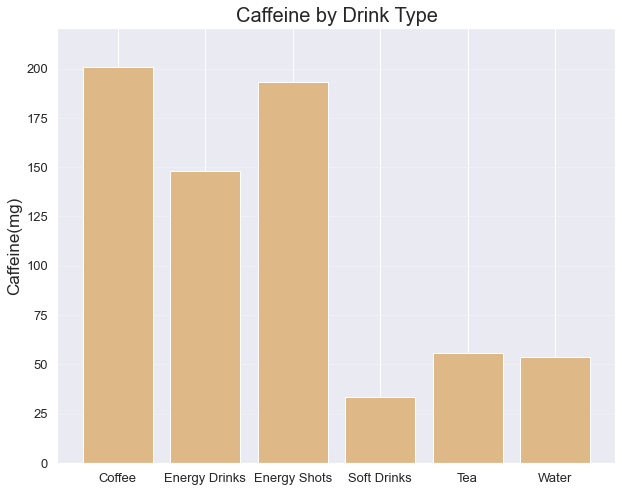

In [77]:
#BAR CHART COMPARING THE CAFFEINE CONCENTRATION AMONG DRINK TYPES

# step 1, get the data
x = df2mean.index
y = df2mean["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="burlywood")

# step 3, customization
plt.title("Caffeine by Drink Type",fontsize = 20)
plt.ylabel("Caffeine(mg)", fontsize = 17)
#plt.xlabel("Drink Type", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

# step 4, saving/showing
plt.show()

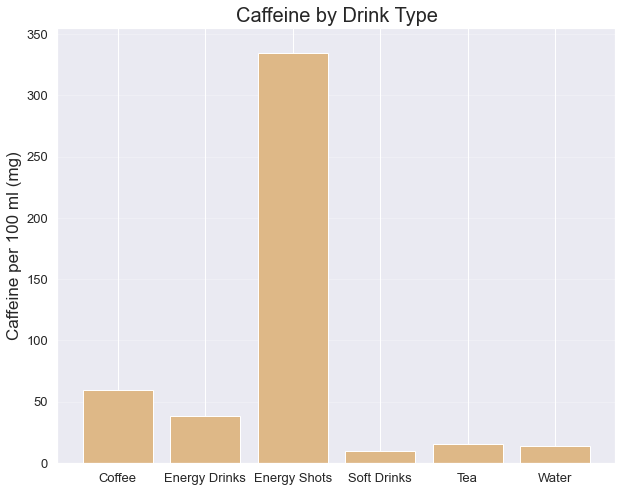

In [78]:
#BAR CHART COMPARING THE CAFFEINE PER 100ML) CONCENTRATION AMONG DRINK TYPES
# step 1, get the data
x = df2mean.index
y = df2mean["Caffeine_per_100ml"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="burlywood")

# step 3, customization
plt.title("Caffeine by Drink Type",fontsize = 20)
plt.ylabel("Caffeine per 100 ml (mg)", fontsize = 17)
#plt.xlabel("Drink Type", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

# step 4, saving/showing
plt.show()

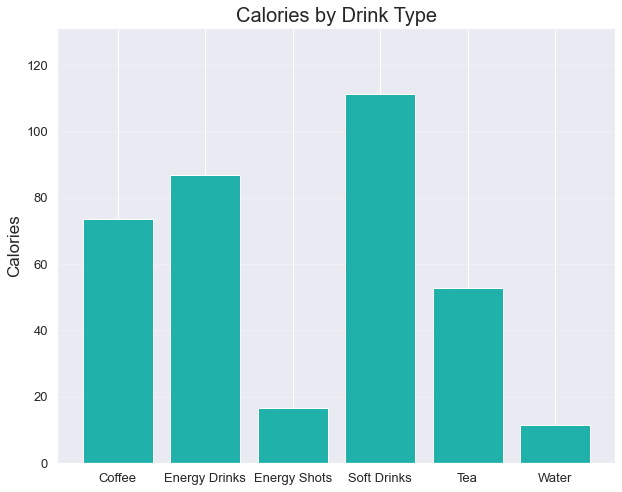

In [79]:
#BAR GRAPH CALORIES BY DRINK TYPE

# step 1, get the data
x = df2mean.index
y= df2mean.Calories


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
plt.title("Calories by Drink Type",fontsize = 20)
plt.ylabel("Calories", fontsize = 17)
#plt.xlabel("Drink Type", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

# step 4, saving/showing
plt.show()

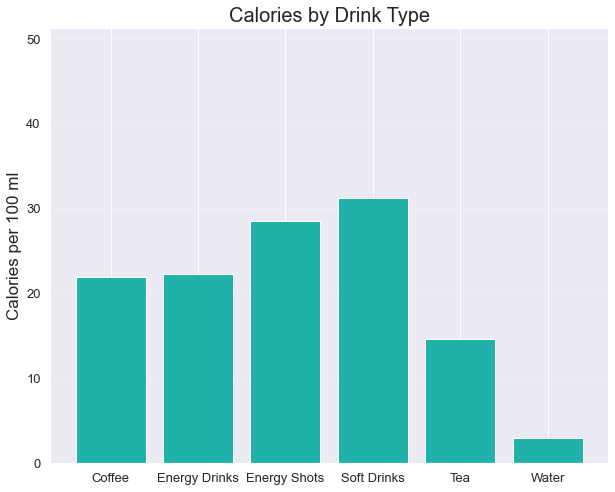

In [80]:
#BAR GRAPH CALORIES 9PER 100 ML) BY DRINK TYPE

# step 1, get the data
x = df2mean.index
y= df2mean.Calories_per_100ml


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
plt.title("Calories by Drink Type",fontsize = 20)
plt.ylabel("Calories per 100 ml", fontsize = 17)
#plt.xlabel("Drink Type", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

# step 4, saving/showing
plt.show()

In [81]:
df2.corr()

,Volume (ml),Calories,Caffeine (mg),Caffeine_per_100ml,Calories_per_100ml
Volume (ml),1.000000,0.447615,-0.554659,-0.984828,-0.477444
Calories,0.447615,1.000000,-0.144163,-0.495216,0.570325
Caffeine (mg),-0.554659,-0.144163,1.000000,0.636625,0.349663
Caffeine_per_100ml,-0.984828,-0.495216,0.636625,1.000000,0.419014
Calories_per_100ml,-0.477444,0.570325,0.349663,0.419014,1.000000


Text(0.5, 1.0, 'Correlation between Carories, Volume and Caffeine\n')

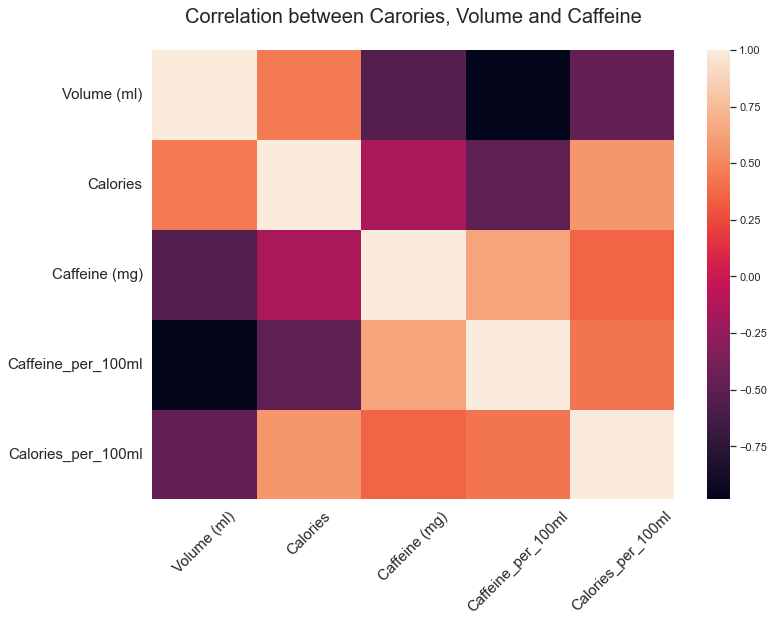

In [82]:
#HEATMAP
sns.heatmap(df2.corr())
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.title("Correlation between Carories, Volume and Caffeine\n",fontsize = 20)